1. 将灰度图转为rgb图，r填充，gb为0
2. 进行min-max归一化

In [4]:
# ================ import env
import os,sys
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image
import tifffile

# jpg
test_path = "/home/yingmuzhi/SegPNN/src/20250213/1.jpg"
image = Image.open(test_path)
image = np.array(image.convert("RGB"))
print(image.shape, image.dtype, image.max(), image[:, :, 1])

# tif
tif_path = "/home/yingmuzhi/SegPNN/src/20250213/20250102 JS WFA-PV 60X.tif"
tif_image = tifffile.imread(tif_path)
print(tif_image.shape, tif_image.dtype, tif_image.max())

# preprocess
tif_image = tif_image[2, :, :]

# 将灰度图像转换为 RGB 格式
def grayscale_to_rgb(gray_image):
    # 获取灰度图像的高度和宽度
    height, width = gray_image.shape

    # 创建一个空的 RGB 图像，形状为 (height, width, 3)
    rgb_image = np.zeros((height, width, 3), dtype=np.uint16)

    # 将灰度值复制到 RGB 的三个通道
    rgb_image[:, :, 0] = gray_image  # 红色通道
    rgb_image[:, :, 1] = 0  # 绿色通道
    rgb_image[:, :, 2] = 0  # 蓝色通道

    return rgb_image

tif_image = grayscale_to_rgb(tif_image)
###### turn unit16 -> unint8
# === Method1 === (not recomanded)
# tif_image = (tif_image / 65535 * 255 ).astype(np.uint8)
# === Method2 === (recomanded)
def min_max_normalize_to_range(data, range=255):
    """
    将数据归一化到 [0, range] 范围
    :param data: 输入的 ndarray
    :return: 归一化后的 ndarray，数据类型为 uint8
    """
    # 计算数据的最小值和最大值
    data_min = np.min(data)
    data_max = np.max(data)

    # 避免除零错误（如果数据的最小值和最大值相等）
    if data_max == data_min:
        return np.zeros_like(data, dtype=np.uint8)

    # 归一化到 [0, range]
    normalized_data = (data - data_min) / (data_max - data_min) * range

    # 将结果转换为 uint8 类型
    normalized_data = normalized_data.astype(np.uint8)

    return normalized_data
tif_image = min_max_normalize_to_range(tif_image)

print(tif_image.shape, tif_image.dtype, tif_image.max())
tifffile.imwrite("/home/yingmuzhi/SegPNN/src/20250213/2.jpg", tif_image)
pass


(1478, 1482, 3) uint8 255 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(4, 1000, 1000) uint16 4095
(1000, 1000, 3) uint8 255


## hisgram

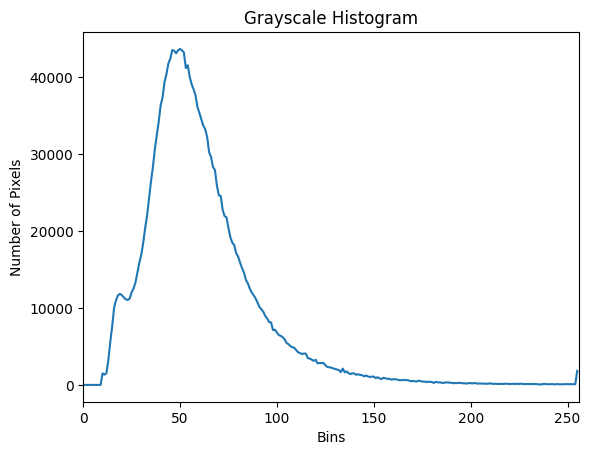

In [5]:
import cv2
import matplotlib.pyplot as plt



# 计算直方图
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# 显示直方图
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("Number of Pixels")
plt.plot(histogram)
plt.xlim([0, 256])
plt.show()

19.984378333333332


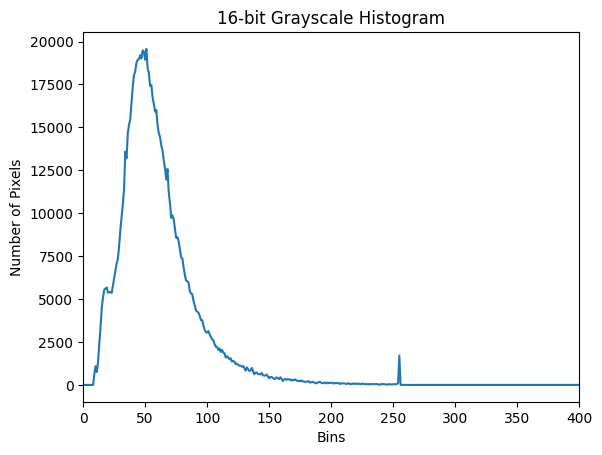

In [6]:
# 计算直方图
histogram = cv2.calcHist([tif_image], [0], None, [65536], [0, 65536])
print(tif_image.mean())

# 显示直方图
plt.figure()
plt.title("16-bit Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("Number of Pixels")
plt.plot(histogram)
# plt.xlim([0, 65536])  # 设置x轴范围为0到65535
plt.xlim([0, 400])  # 设置x轴范围为0到65535
plt.show()